In [72]:
import librosa
import os
#from subprocess import call
#r=call('ffmpeg -i "test.mp3" -acodec pcm_u8 -ar 22050 "test.wav"',shell=True)

In [73]:
os.listdir()

['.ipynb_checkpoints',
 '04 morning is come.mp3',
 '04 morning is come.wav',
 'Untitled.ipynb']

In [74]:
filename = "04 morning is come.wav"

In [75]:
filename

'04 morning is come.wav'

In [76]:
# in my case, only .wav file can work
# waveform `y`
# Store the sampling rate as `sr`
y, sr =  librosa.load(filename)

In [77]:
# get song_long
librosa.get_duration(y)

320.14666666666665

In [78]:
# get tempo and beats
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 161.50 beats per minute


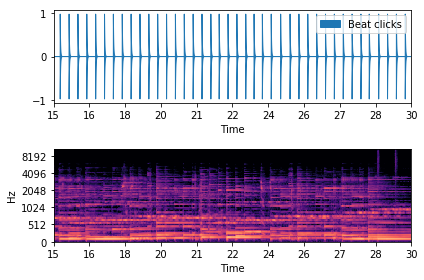

In [84]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
plt.figure()
S = librosa.feature.melspectrogram(y=y, sr=sr)
ax = plt.subplot(2,1,2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel')

plt.subplot(2,1,1, sharex=ax)
# Or use timing instead of frame indices
times = librosa.frames_to_time(beats, sr=sr)
y_beat_times = librosa.clicks(times=times, sr=sr)

librosa.display.waveplot(y_beat_times, sr=sr, label='Beat clicks')

plt.legend()
plt.xlim(15, 30)
plt.tight_layout()

In [90]:
y, sr = librosa.load(filename, offset=30, duration=5)
mfccs = librosa.feature.mfcc(y=y, sr=sr)

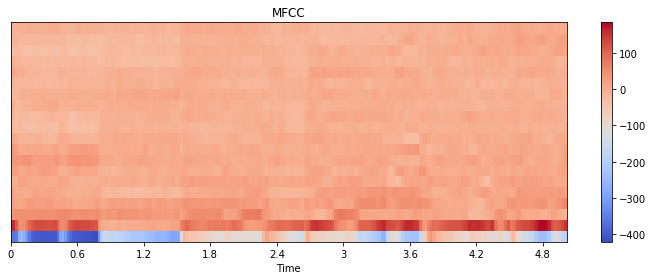

In [91]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [92]:
mfccs

array([[-3.53054873e+02, -3.64389624e+02, -3.52850521e+02, ...,
        -1.40595616e+02, -1.76406668e+02, -1.88929874e+02],
       [ 1.60958723e+02,  1.56352573e+02,  1.12089455e+02, ...,
         1.18757309e+02,  1.34165961e+02,  1.54169394e+02],
       [ 4.00744640e+01,  4.23096877e+01,  4.80178226e+01, ...,
         5.82639598e+00, -2.05784879e+00, -9.37476260e+00],
       ...,
       [-2.65643641e+01, -2.40050017e+01, -2.32516306e+01, ...,
         1.95304336e+01,  1.89370912e+01,  1.36147877e+01],
       [-6.46568274e+00, -9.25601904e+00, -1.12899773e+01, ...,
         1.62470601e+01,  2.12819992e+01,  2.23014176e+01],
       [-6.05221081e+00, -3.54562362e+00, -4.08472300e+00, ...,
         3.27601293e-01,  1.15317078e+00,  1.70736768e+00]])